# Using CellPipeline
## A cell type specific analysis and visualization tool for the gene of interest

In [1]:
import sys
sys.path.append('/Users/samibening/Projects/genereporter/')
from importlib import reload
import genereporter.cell_pipeline as cp
#from genereporter.cell_pipeline import CellPipeline
reload(cp)

cp = cp.CellPipeline("/Users/samibening/Projects/genereporter/", "data/output/adata.h5ad")

adata = cp.get_adata()
adata

AnnData object with n_obs × n_vars = 5397 × 16719
    obs: 'sampleID', 'barcode', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels', 'leiden_res0_6', 'manual_celltype_annotation', 'celltypist_cell_label', 'celltypist_conf_score', 'celltypist_cell_label_coarse'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltypist_cell_label_coarse_colors', 'celltypist_cell_label_colors', 'hvg', 'leiden', 'leiden_res0_6_colors', 'neighbors', 'pca', 'sampleID_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'int_norm', 'log_int_norm', 'log_norm', 'norm', 'raw'
    obsp: 'connectivitie

In [2]:
# print cell type names here; easier to select
print(f"Coarse cell types: ")
for cell_type in adata.obs['celltypist_cell_label_coarse'].unique():
    print(f"\t{cell_type}")

Coarse cell types: 
	mLTo
	Monocytes
	B Cell
	Epithelial
	T Cell
	Dentritic
	Plasma
	Enteroendocrine
	Colonocyte
	myofibroblast
	Stromal
	Adult Glia
	Pericyte
	ILC3
	NK cell
	Macrophages
	Goblet


In [3]:
# set your gene of interest (GOI)
GOI = "CASP8"

# set your cell type of interest (cell_type)
# set this later on, after expression across cell type plots? Then can't run the entire notebook easily
cell_type = 'Macrophages'

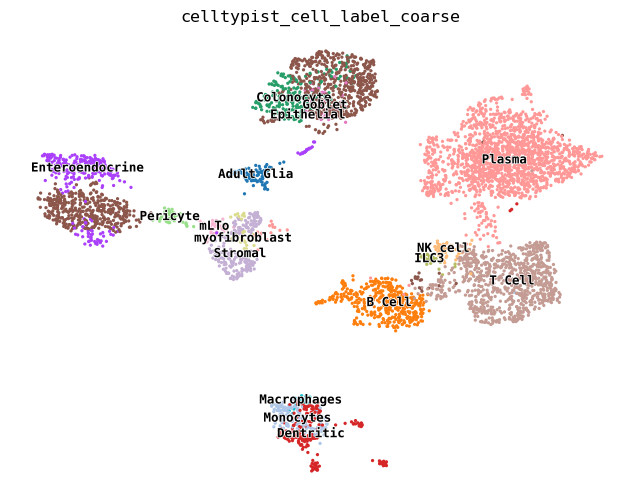

In [4]:
# UMAP of coarse cell types
cp.plot_umap()

In [5]:
expr_sum = cp.explain_expr_celltypes(GOI)
expr_sum
# TODO: sort this by expression high to low? 

,Cell type,Expression class,Avg. expression over cell type
index,,,
CASP8,mLTo,very low,0.034
CASP8,Monocytes,very low,0.171
CASP8,B Cell,very low,0.221
CASP8,Epithelial,very low,0.135
CASP8,T Cell,low,0.399
CASP8,Dentritic,very low,0.162
CASP8,Plasma,very low,0.184
CASP8,Enteroendocrine,very low,0.163
CASP8,Colonocyte,very low,0.120


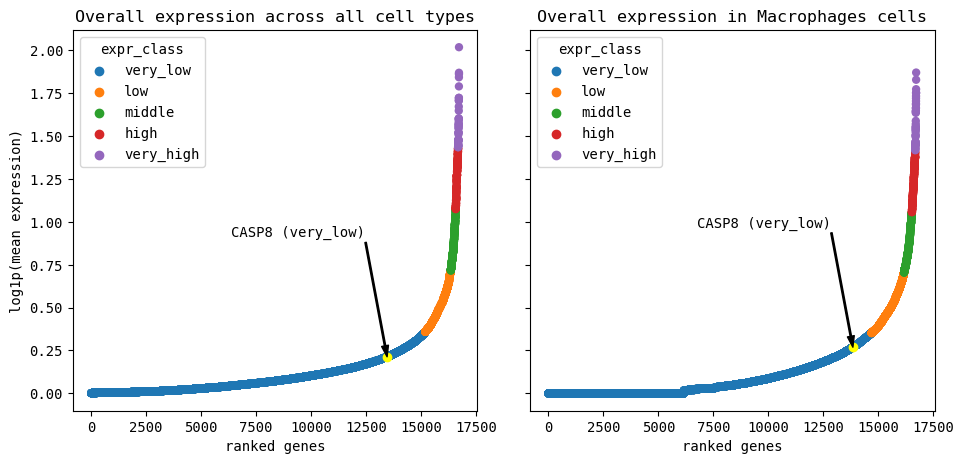

Summary for all cells: 
Quantile thresholds: 
very low: 90.8188, low: 97.769, middle: 99.0909, high: 99.7488, very high: 99.7500

Number of genes per category: 
very_low: 15184
low: 1162
middle: 221
high: 110
very_high: 42


Summary for Macrophages cells: 
Quantile thresholds: 
very low: 87.8581, low: 96.7163, middle: 98.8396, high: 99.7488, very high: 99.7500

Number of genes per category: 
very_low: 14689
low: 1481
middle: 355
high: 152
very_high: 42



In [6]:
cp.plot_expressions(GOI, cell_type, show_summary=True)
# Can change show_summary=True to show the summary of the expression classes (quantile thresholds and cell counts per category)

## GOI expression across cell types

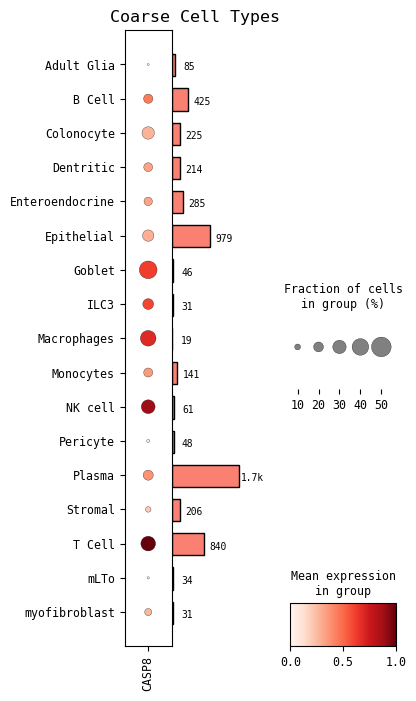

In [7]:
# find expression across cell types of GOI here
cp.dotplot(GOI)

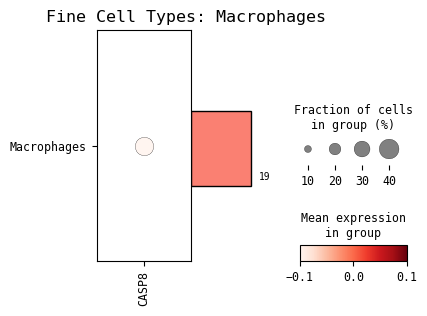

In [8]:
cp.dotplot(GOI, cell_type=cell_type)

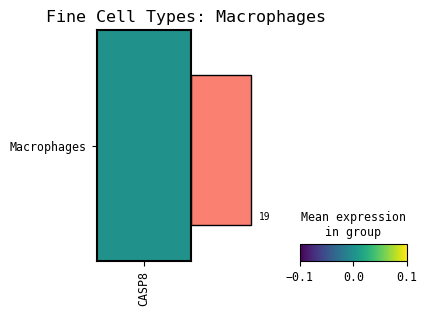

In [9]:
cp.matrixplot(GOI, cell_type=cell_type)

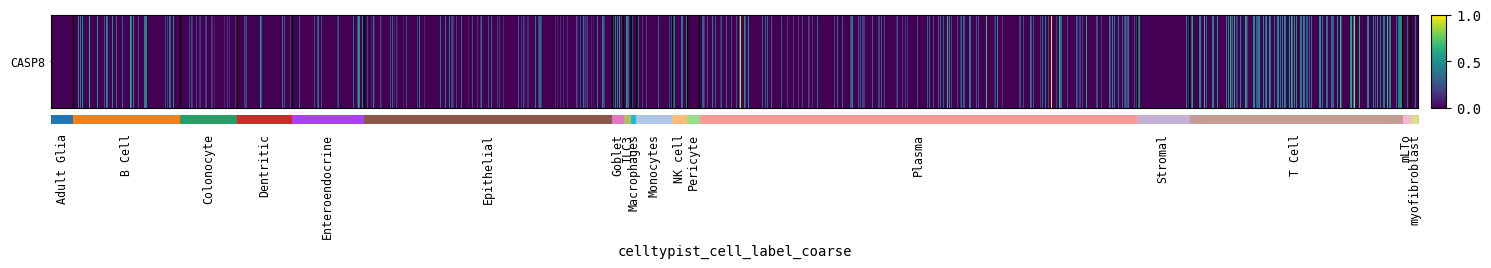

In [10]:
cp.heatmap(GOI)

## Expression vs. Detection visualization
<body>
<br>
This can contextualize the expression levels we observed previously. In single-cell RNA-seq, only a random sampling of the RNA present in a cell is selected to be sequenced. By pure chance, lowly expressed genes may not be present in all the sampled RNA due to their low prevalance. Here, we can inspect the maximum percentage of expression expected in all genes, specifically our gene of interest. 
</body>

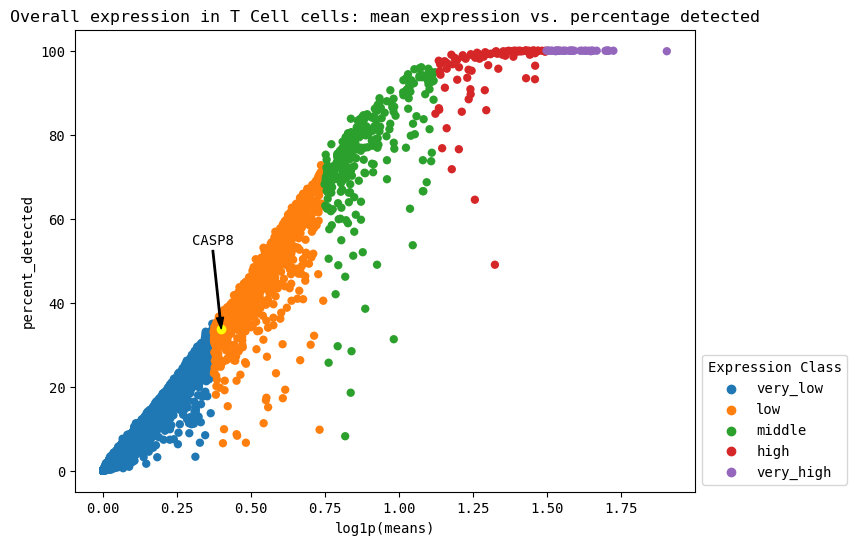

In [17]:
cp.expression_vs_detection(GOI, cell_type='T Cell')
# Can add "cell_type=cell_type" to plot only the cell type of interest
# rather have a side by side view here again? 
# todo this section before dotplots etc. 

### Automatically identify lower outliers (clue to look at celltype subset)

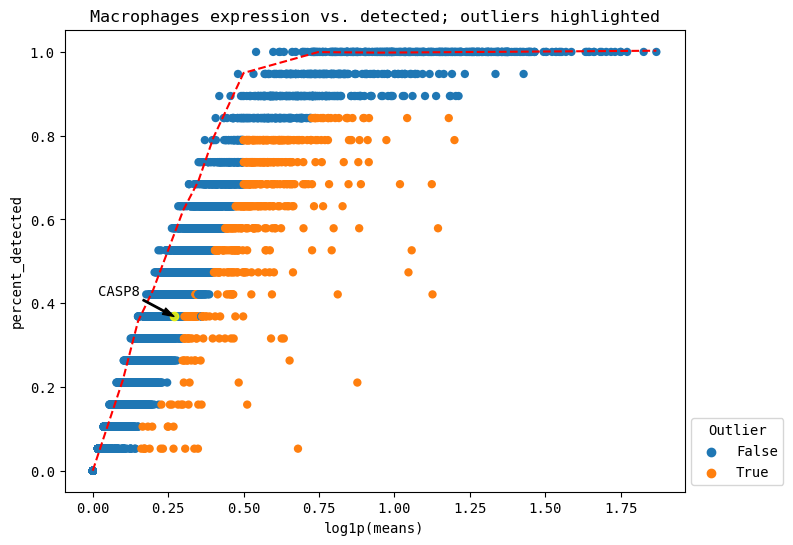

In [12]:
cp.plot_outliers(GOI, cell_type=cell_type, outlier_threshold=0.15)
# Can add "cell_type=cell_type" to plot only the cell type of interest

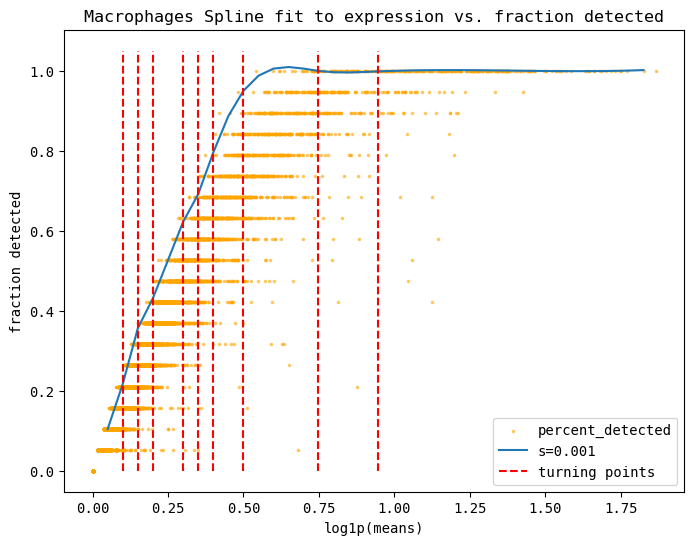

In [16]:
cp.fit_spline(cell_type = cell_type, plot=True)

In [13]:
cp.list_outliers()
# show top 5 most extreme outlier genes
# (by orthogonal distance to the max line)
# can show top x genes by adding "head=x" to the function

#TODO: make outlier plot above interactive? Hover over dot to show gene name etc. (sami: use plotly)
#      Slider for threshold value? 

,log1p(means),percent_detected,distance,is_outlier
index,,,,
CXCL14,1.002802,0.075783,0.848793,True
IGLC7,0.932603,0.045951,0.772127,True
IGHG1,0.963830,0.067074,0.766993,True
IGHM,1.242698,0.212525,0.760515,True
IGFBP7,1.167887,0.246063,0.713274,True
